In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [20]:
# 1 Load dataset

df = pd.read_csv("Dataset/Dataset.csv")

print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

Shape: (235795, 56)

Columns:
 ['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label']


In [21]:
# 2  Drop unused string ID column

df = df.drop("FILENAME", axis=1)


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         235795 non-null  object 
 1   URLLength                   235795 non-null  int64  
 2   Domain                      235795 non-null  object 
 3   DomainLength                235795 non-null  int64  
 4   IsDomainIP                  235795 non-null  int64  
 5   TLD                         235795 non-null  object 
 6   URLSimilarityIndex          235795 non-null  float64
 7   CharContinuationRate        235795 non-null  float64
 8   TLDLegitimateProb           235795 non-null  float64
 9   URLCharProb                 235795 non-null  float64
 10  TLDLength                   235795 non-null  int64  
 11  NoOfSubDomain               235795 non-null  int64  
 12  HasObfuscation              235795 non-null  int64  
 13  N

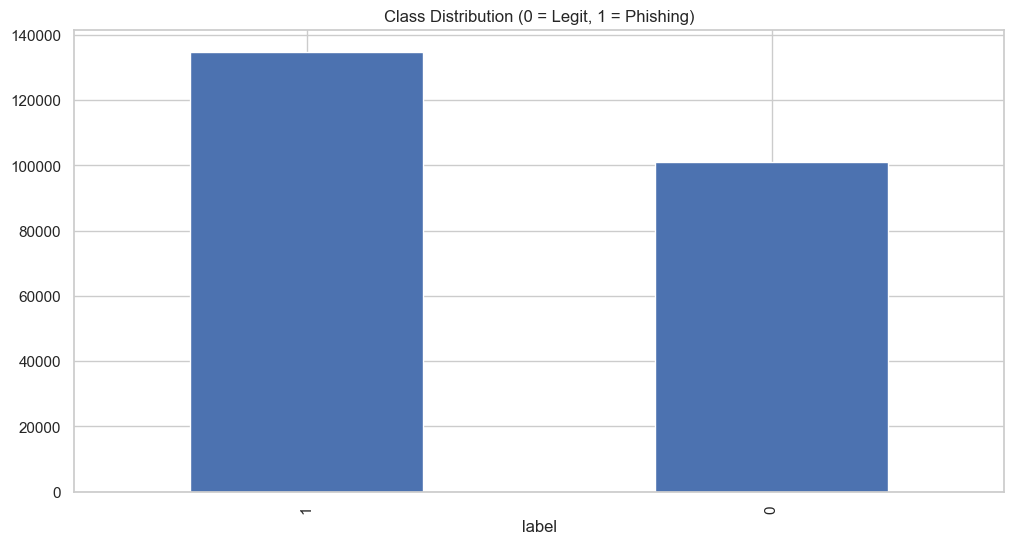


Class distribution (normalized):
label
1    0.571895
0    0.428105
Name: proportion, dtype: float64


In [22]:
# 3.Basic info

print("\nData Types:")
df.info()

print("\nDescribe numeric only:")
print(df.describe().T)

missing = df.isna().sum()
print("\nMissing values:")
print(missing[missing > 0])

target_col = "label"

df[target_col].value_counts().plot(kind="bar")
plt.title("Class Distribution (0 = Legit, 1 = Phishing)")
plt.show()

print("\nClass distribution (normalized):")
print(df[target_col].value_counts(normalize=True))

In [23]:
# 6 Separate numeric vs non-numeric

non_numeric = df.select_dtypes(exclude=[np.number]).columns.tolist()
numeric = df.select_dtypes(include=[np.number]).columns.tolist()

print("\nNon-numeric columns:", non_numeric)
print("\nNumeric columns:", numeric)

# REMOVE non-numeric columns from any numeric analysis
numeric = [col for col in numeric if col != target_col]


Non-numeric columns: ['URL', 'Domain', 'TLD', 'Title']

Numeric columns: ['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label']


In [24]:
# 7 Correlation with target

corr_target = df[numeric + [target_col]].corr()[target_col].abs().sort_values(ascending=False)

# Top features (excluding target itself)
top_features = corr_target.index[1:7]
print("\nTop Features:", top_features.tolist())


Top Features: ['URLSimilarityIndex', 'HasSocialNet', 'HasCopyrightInfo', 'HasDescription', 'IsHTTPS', 'DomainTitleMatchScore']


C:\Users\Pradhyumnaa G\AppData\Local\Temp\ipykernel_18784\3540509466.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue=target_col, fill=True)


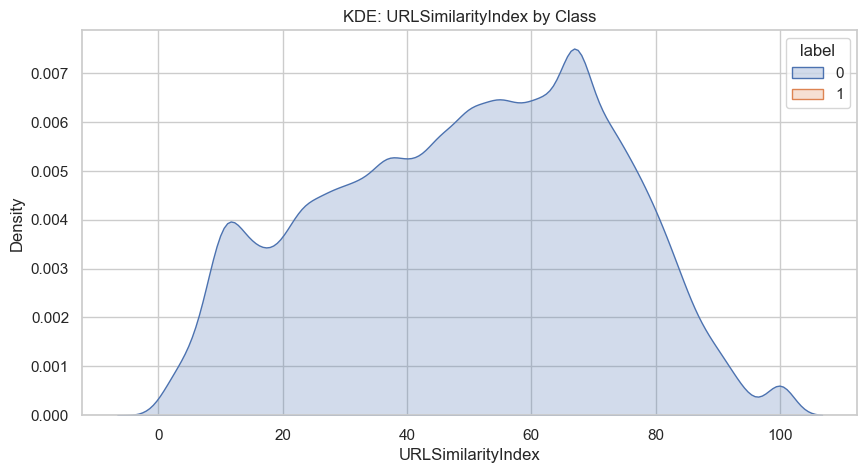

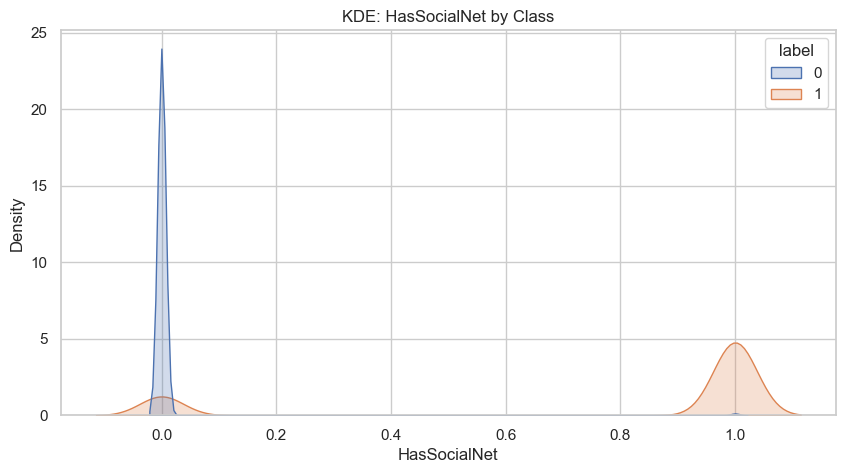

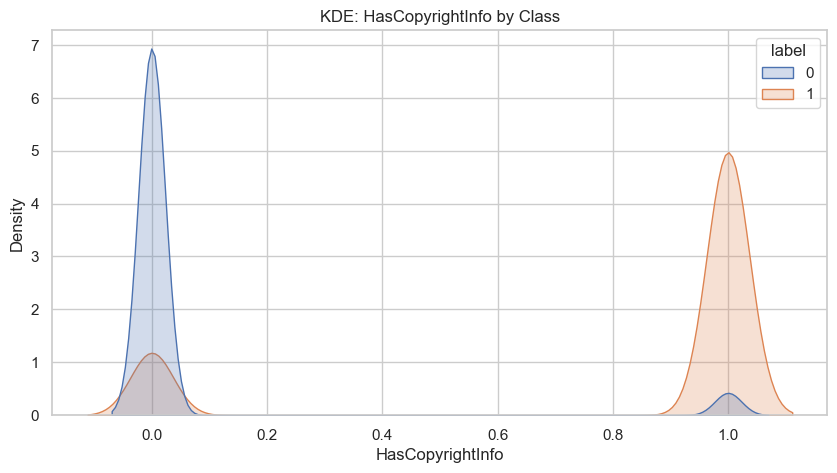

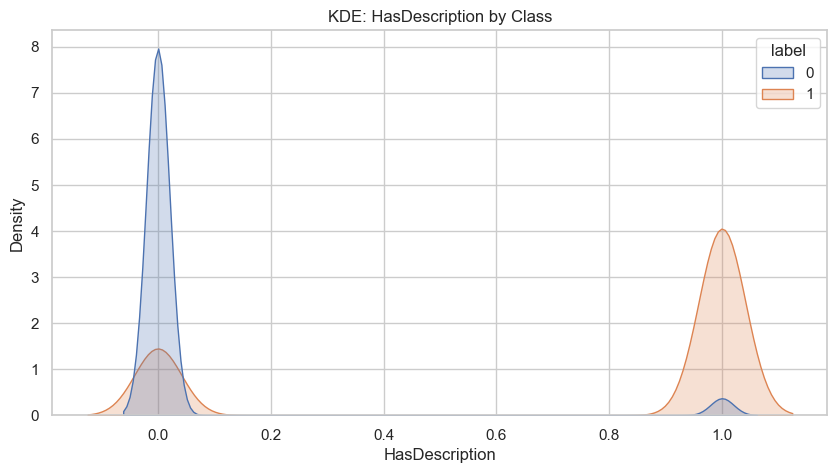

C:\Users\Pradhyumnaa G\AppData\Local\Temp\ipykernel_18784\3540509466.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue=target_col, fill=True)


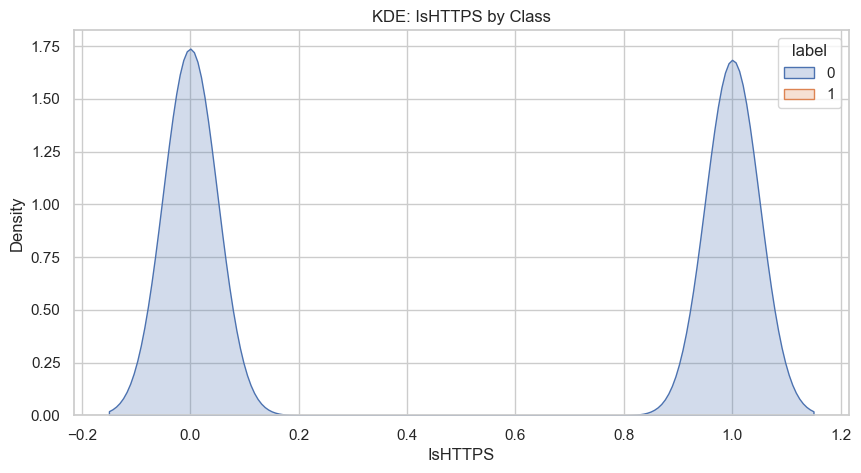

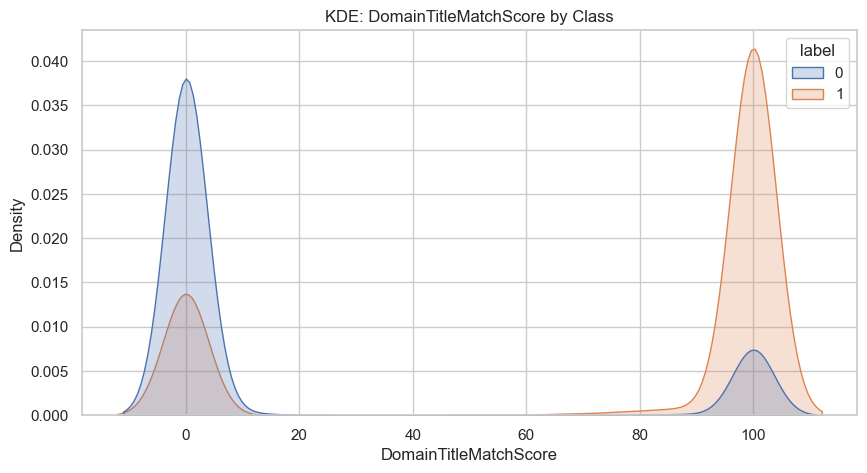

In [25]:
# 8 KDE plots for top features

for col in top_features:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=df, x=col, hue=target_col, fill=True)
    plt.title(f"KDE: {col} by Class")
    plt.show()

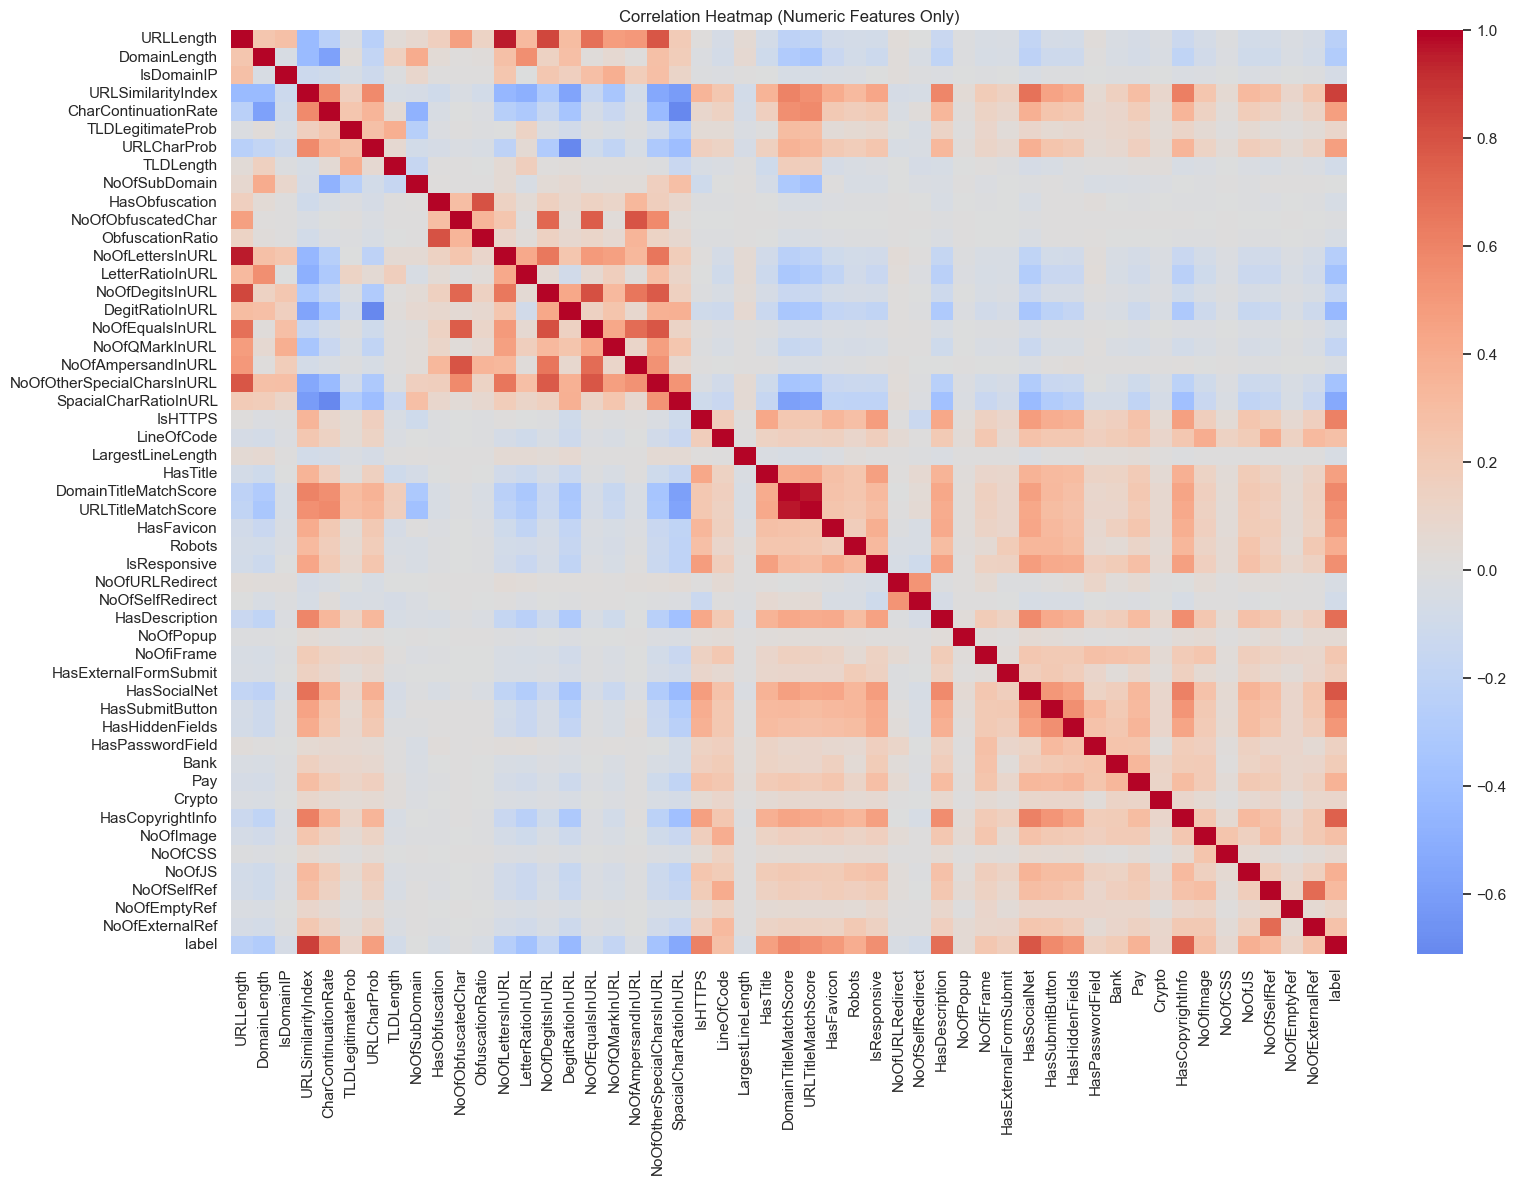

In [26]:
# 9 Correlation heatmap

plt.figure(figsize=(18, 12))
corr = df[numeric + [target_col]].corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [27]:
# 10 Most Associated Features for each label

class_means = df.groupby(target_col)[numeric].mean().T
class_means.columns = ['fake_mean', 'legit_mean']
class_means

,fake_mean,legit_mean
URLLength,45.720293,26.228610
DomainLength,24.465144,19.228610
IsDomainIP,0.006320,0.000000
URLSimilarityIndex,49.616973,100.000000
CharContinuationRate,0.728395,0.933176
TLDLegitimateProb,0.232099,0.281625
URLCharProb,0.049999,0.060050
TLDLength,2.819327,2.723382
NoOfSubDomain,1.168894,1.161661
HasObfuscation,0.004805,0.000000


In [28]:
# 11 For Phishing

phishing_top = (class_means['fake_mean'] - class_means['legit_mean']).sort_values(ascending=False)
print(phishing_top.head(10))

LargestLineLength             12645.528689
URLLength                        19.491684
NoOfLettersInURL                 15.173524
DomainLength                      5.236535
NoOfDegitsInURL                   4.275620
NoOfOtherSpecialCharsInURL        2.558632
NoOfEqualsInURL                   0.145386
TLDLength                         0.095946
LetterRatioInURL                  0.091661
NoOfQMarkInURL                    0.068681
dtype: float64


In [29]:
# 12 for Legit

legit_top = (class_means['legit_mean'] - class_means['fake_mean']).sort_values(ascending=False)
print(legit_top.head(10))

LineOfCode               1881.761213
NoOfSelfRef               112.914209
NoOfExternalRef            84.166482
DomainTitleMatchScore      58.722698
URLTitleMatchScore         54.072739
URLSimilarityIndex         50.383027
NoOfImage                  44.080108
NoOfJS                     16.842196
NoOfCSS                    10.305205
NoOfEmptyRef                3.894508
dtype: float64
